In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=0.00025, optimizer='nadam', loss='mae', scale=1e9, early_stop=False, target_stop=2)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 124.79666
epoch  1 --- Loss --- 123.45321
epoch  2 --- Loss --- 122.10144
epoch  3 --- Loss --- 120.74326
epoch  4 --- Loss --- 119.3813
epoch  5 --- Loss --- 118.016685
epoch  6 --- Loss --- 116.65009
epoch  7 --- Loss --- 115.28202
epoch  8 --- Loss --- 113.912834
epoch  9 --- Loss --- 112.54279
epoch  10 --- Loss --- 111.17211
epoch  11 --- Loss --- 109.800934
epoch  12 --- Loss --- 108.42935
epoch  13 --- Loss --- 107.05745
epoch  14 --- Loss --- 105.68527
epoch  15 --- Loss --- 104.31284
epoch  16 --- Loss --- 102.94018
epoch  17 --- Loss --- 101.58619
epoch  18 --- Loss --- 100.29789
epoch  19 --- Loss --- 99.01076
epoch  20 --- Loss --- 97.72325
epoch  21 --- Loss --- 96.43532
epoch  22 --- Loss --- 95.20657
epoch  23 --- Loss --- 94.036705
epoch  24 --- Loss --- 92.87157
epoch  25 --- Loss --- 91.70494
epoch  26 --- Loss --- 90.53657
epoch  27 --- Loss --- 89.36628
epoch  28 --- Loss --- 88.193924
epoch  29 --- Loss --- 87.01936
epoch  30 --- Loss --- 85.8

In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 136.1350424528122 minutes


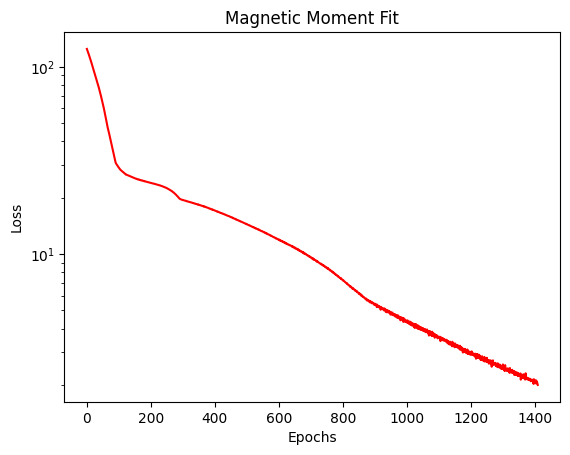

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[ 0.00928569  0.28752574 -0.0222549 ]]
Value:     [[-0.16922781  1.5913701   0.34936097]]
---- Moment  1 -----
Position:  [[ 0.5066946  -0.02403863 -0.0148253 ]]
Value:     [[0.9282587  0.13899563 0.09685456]]
---- Moment  2 -----
Position:  [[-0.03565207 -0.03914407  0.16265783]]
Value:     [[0.22451767 0.19426161 2.524824  ]]
